<a target="_blank" href="https://colab.research.google.com/github/RodrigoAVargasHdz/CHEM-4PB3/blob/w2024/Course_Notes/Week%203/Week_3_Linear_Regression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Introduction to Linear Regression ##

$$
    f(x) = w_0 + w_1x_1 + w_2x_2 + \ldots + w_dx_d = \begin{bmatrix}
    w_0 & w_1 & \cdots & w_p \\
    \end{bmatrix} \begin{bmatrix}
    1 \\
    x_1 \\
    \vdots \\
    x_d
      \end{bmatrix}
$$

* **d** ->  is the number of dimensions or features in $\mathbf{x}$
* $\mathbf{w}$ -> parameters of the linear model

# Loss function #
* Quantify the accuracy of the linear model.
  $$
    \cal{L}(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^{N} \left( f(\mathbf{x}_i) - y_i \right)^2 = \frac{1}{2} \sum_{i=1}^{N} \left( \mathbf{w}^\top \mathbf{x}_i - y_i \right)^2 
  $$
  $$
    \cal{L}(\mathbf{w}) = \frac{1}{2} \left (\mathbf{y} - \mathbf{X} \mathbf{w} \right)^\top \left (\mathbf{y} - \mathbf{X}\mathbf{w} \right)
  $$
What is $\mathbf{X}$ and $\mathbf{y}$?
$$
   \mathbf{X} = \begin{pmatrix}
[ x_1^0, & x_1^1, & \cdots,& x_1^{d-1}, & x_1^d ] \\ 
[ x_2^0, & x_2^1, & \cdots,& x_2^{d-1}, & x_2^d]  \\ 
  & & \cdots & &  \\
[ x_{N-1}^0, & x_{N-1}^1, & \cdots,& x_{N-1}^{d-1}, & x_{N-1}^d ] \\
[ x_{N}^0, & x_{N-1}^1, & \cdots,& x_{N}^{d-1}, & x_{Nt}^d ] 
\end{pmatrix} =  \begin{pmatrix}
\mathbf{x}_1^\top\\
\vdots \\
\mathbf{x}_n^\top\\
\end{pmatrix}
$$

$$
   \mathbf{y} =  \begin{pmatrix}
y_1\\
\vdots \\
y_n\\
\end{pmatrix}
$$

In [21]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N,bool_biased=True):
    x = np.linspace(-1.,1.,N) #This creates an array x of N linearly spaced values between -1 and 1.
    y = np.sin(.5*x) + x -1.
    y = y + np.random.uniform(low = 0.,high=0.5,size=x.shape) #Adds random noise to each y value.
    if bool_biased:
        X = np.column_stack((np.ones_like(x),x))
    else:
        X = x[:,None]
    return X,y

X,y = get_data(10,bool_biased=True) 
print(X)
print(y)

[[ 1.         -1.        ]
 [ 1.         -0.77777778]
 [ 1.         -0.55555556]
 [ 1.         -0.33333333]
 [ 1.         -0.11111111]
 [ 1.          0.11111111]
 [ 1.          0.33333333]
 [ 1.          0.55555556]
 [ 1.          0.77777778]
 [ 1.          1.        ]]
[-2.12654959 -1.86818587 -1.56663824 -1.44410431 -1.09586788 -0.63109129
 -0.17754086  0.162744    0.39831187  0.58424638]


Let's look closer to the term $\mathbf{X}\mathbf{w}$,
$$
 \mathbf{X}\mathbf{w}  =  \begin{pmatrix}
\mathbf{x}_1^T\\ 
\vdots \\
\mathbf{x}_N^T
\end{pmatrix} \mathbf{w} = \begin{pmatrix}
[ x_1^0, & \cdots,& x_1^d ] \\ 
\cdots  & \cdots & \cdots \\
[ x_N^0, & \cdots, & x_N^d ] 
\end{pmatrix} \begin{pmatrix} 
w_0\\
\vdots \\
w_d
\end{pmatrix}
$$

In [17]:
# random parameters
def get_random_params(d):
    theta_random = np.random.uniform(low=-2., high=2., size=(d))
    return theta_random

In [22]:
w = get_random_params(2)
print('Parameters: ', w)

# what operation is Xw?
print(X.shape)
print(np.dot(X,w))
print(X@w)
print(np.matmul(X,w))

Parameters:  [-0.04029437  1.21839474]
(10, 2)
[-1.25868912 -0.98793473 -0.71718034 -0.44642595 -0.17567157  0.09508282
  0.36583721  0.6365916   0.90734598  1.17810037]
[-1.25868912 -0.98793473 -0.71718034 -0.44642595 -0.17567157  0.09508282
  0.36583721  0.6365916   0.90734598  1.17810037]
[-1.25868912 -0.98793473 -0.71718034 -0.44642595 -0.17567157  0.09508282
  0.36583721  0.6365916   0.90734598  1.17810037]


## Exact Solution of Linear Regression ##

* **Gradient of a function equal to zero means a maxima or minima**
  
$$
    \nabla {\cal L}(\mathbf{w}) \Big\rvert_{\mathbf{w}^{*}} = \frac{1}{2} \nabla_{\mathbf{w}} \left [ \left (\mathbf{y} - \mathbf{X}\mathbf{w} \right)^\top \left (\mathbf{y} - \mathbf{X}\mathbf{w} \right) \right ]= 0
$$

To solve for $\mathbf{w}^*$, let's expand $ \left (\mathbf{y} - \mathbf{X}\mathbf{w} \right)^\top \left (\mathbf{y} - \mathbf{X}\mathbf{w} \right)$,

$$
    \left (\mathbf{y} - \mathbf{X}\mathbf{w} \right)^\top \left (\mathbf{y} - \mathbf{X}\mathbf{w} \right) = \mathbf{y}^\top \mathbf{y}  - \mathbf{y}^\top \mathbf{X}\mathbf{w} -  \mathbf{w}^\top\mathbf{X}^\top\mathbf{y} +   \mathbf{w}^\top\mathbf{X}^\top \mathbf{X}\mathbf{w}
$$
$$
    \nabla_{\mathbf{w}} {\cal L}(\mathbf{w}) = \frac{1}{2}\left(  -2 \mathbf{X}^\top\mathbf{y} + 2\mathbf{X}^\top\mathbf{X}\mathbf{w} \right) = 0
$$

**Extra:**
1. Homework, Proof the above equations.
2. [Equations from Sections 2.4.1 and 2.4.2](https://www2.imm.dtu.dk/pubdb/edoc/imm3274.pdf)

Solving for $\mathbf{w}$,
$$
\begin{align}
\nabla_{\mathbf{w}} {\cal L}(\mathbf{w}) &= \frac{1}{2}\left(  -2 \mathbf{X}^\top\mathbf{y} + 2{\color{blue}\mathbf{X}^\top\mathbf{X}} \mathbf{w} \right) = 0 \\
 {\color{blue}\mathbf{X}^\top\mathbf{X}} \mathbf{w}  &=  \mathbf{X}^\top\mathbf{y} \\
  \mathbf{w}^* &= \left ( {\color{blue}\mathbf{X}^\top\mathbf{X}}\right ) ^{-1} \mathbf{X}^\top\mathbf{y}
\end{align}
$$

**What is $\mathbf{X}^\top\mathbf{X}$ ?**

$$
 \mathbf{X}^\top\mathbf{X} = \begin{pmatrix}
 x_1^0 &  x_2^0 & \cdots& x_N^0  \\ 
  x_1^1 &  x_2^1 & \cdots& x_N^1  \\ 
\vdots &  \vdots & \vdots& \vdots  \\ 
  x_{1}^{d-1} &  x_{2}^{d-1}& \cdots& x_{N}^{d-1}  \\ 
    x_{1}^{d} &  x_{2}^{d}& \cdots& x_{N}^{d} 
\end{pmatrix} \begin{pmatrix}
[ x_1^0, & x_1^1, & \cdots,& x_1^{d-1}, & x_1^d ] \\ 
[ x_2^0, & x_2^1, & \cdots,& x_2^{d-1}, & x_2^d]  \\ 
  & & \cdots & &  \\
[ x_{N-1}^0, & x_{N-1}^1, & \cdots,& x_{N-1}^{d-1}, & x_{N-1}^d ] \\
[ x_{N}^0, & x_{N-1}^1, & \cdots,& x_{N}^{d-1}, & x_{Nt}^d ] 
\end{pmatrix} = \begin{pmatrix}
\mathbf{x}_1 & \cdots &  \mathbf{x}_N \end{pmatrix}  \begin{pmatrix}
\mathbf{x}_1^\top\\ 
\vdots \\
\mathbf{x}_N^\top
\end{pmatrix} 
$$

$$
 \mathbf{X}\mathbf{X}^\top = \begin{pmatrix}
[ x_1^0, & x_1^1, & \cdots,& x_1^{d-1}, & x_1^d ] \\ 
[ x_2^0, & x_2^1, & \cdots,& x_2^{d-1}, & x_2^d]  \\ 
  & & \cdots & &  \\
[ x_{N-1}^0, & x_{N-1}^1, & \cdots,& x_{N-1}^{d-1}, & x_{N-1}^d ] \\
[ x_{N}^0, & x_{N-1}^1, & \cdots,& x_{N}^{d-1}, & x_{Nt}^d ] 
\end{pmatrix} \begin{pmatrix}
 x_1^0 &  x_2^0 & \cdots& x_N^0  \\ 
  x_1^1 &  x_2^1 & \cdots& x_N^1  \\ 
\vdots &  \vdots & \vdots& \vdots  \\ 
  x_{1}^{d-1} &  x_{2}^{d-1}& \cdots& x_{N}^{d-1}  \\ 
    x_{1}^{d} &  x_{2}^{d}& \cdots& x_{N}^{d} 
\end{pmatrix}  =   \begin{pmatrix}
\mathbf{x}_1^\top\\ 
\vdots \\
\mathbf{x}_N^\top
\end{pmatrix} \begin{pmatrix}
\mathbf{x}_1 & \cdots &  \mathbf{x}_N \end{pmatrix}
$$

In [26]:
# code X^t X
print(X.shape)
A = X.T@X
print(A.shape)
B = X@X.T
print(B.shape)

(10, 2)
(2, 2)
(10, 10)


## Optimal parameters ##

$$
 \mathbf{w}^* = \left ( \mathbf{X}^\top \mathbf{X} \right ) ^{-1} \mathbf{X}^\top \mathbf{y}
$$

### Operations ###
1. $\mathbf{X}^\top$ -> matrix transpose 
2. $\mathbf{X}^\top\mathbf{y}$ -> matrix-vector multiplication 
3. $\left (\mathbf{X}^\top\mathbf{X}\right ) ^{-1}$ -> matrix inversion

In [27]:
# inclass excercise
def linear_model_solver(X,y):
    Xt = X.T
    A = Xt@X
    z = Xt@y
    A_inv = np.linalg.inv(A)
    w = A_inv@z
    return w # optimal parameters

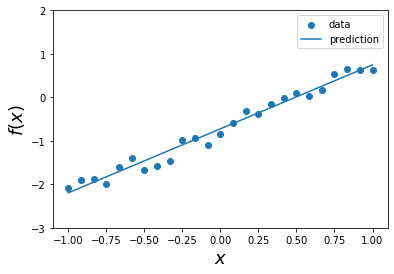

In [28]:
# test our model
X, y = get_data(25)
w = linear_model_solver(X,y)

x_grid = np.linspace(-1.,1.,250)
X_grid = np.column_stack((np.ones_like(x_grid), x_grid))
y_pred = X_grid@w

plt.scatter(X[:,-1], y, label='data')
plt.plot(x_grid, y_pred,label='prediction')
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)
plt.ylim(-3., 2.)
plt.legend()

## Beyond Linear Models ##

Let's revise polynomials:

How many terms if we have a second-order polynomial and $d=3$?
$$
\begin{align}
(1+x_1+x_2+x_3)^3 &= (1+x_1+x_2+x_3)(1+x_1+x_2+x_3)^2 \\
&= 1+3x_1+3x^2_1+x^3_1+3x_2+6x_1x_2+3x^2_1x_2 \\ 
& +3x_2^2+3x_1x_2^2+x_2^3 +3x_3+6x_1x_3+3x_1^2x_3 \\
& +6x_2x_3+6x_1x_2x_3+3x_2^2x_3+3x_3^2 \\
& +3x_1x_3^2+3x_2x_3^2+x_3^3
\end{align}
$$

This is simply a new representation of $x$
$$
\phi(\mathbf{x}) = [1, x_1, x_2, x_3, \cdots, x_i x_j, \cdots, x_i^{ m} x_j^{p}, \cdots, x_i^{ m} x_j^{p}x_{\ell}^{r}]
$$

**Linear models on basis-set expansion**

$$
    f(\mathbf{x},\mathbf{w}) = \sum_{i=0}^d w_i \phi(\mathbf{x}) = \mathbf{w}^\top \phi(\mathbf{x})
$$


* **Loss function**,
$$
    \begin{align}
    {\cal L}(\mathbf{w}) &= \frac{1}{2}\sum_i^N (y_i - f(\mathbf{x}_i,\mathbf{w}))^2 = \frac{1}{2}\sum_i^N (y_i - \mathbf{w}^\top \phi(\mathbf{x}_i))^2 \\
    &= \frac{1}{2} \left (\mathbf{y} - \Phi(\mathbf{x})\mathbf{w} \right)^\top \left (\mathbf{y} -  \Phi(\mathbf{x})\mathbf{w} \right)
    \end{align}
$$
Homework, proof the above equations.


1. What is $\Phi(\mathbf{x})$?
2. What is the form of the **optimal** parameters $\mathbf{w}^*$?

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [31]:
def polynomial_features(X,deg):
    poly = PolynomialFeatures(deg) 
    Phi = poly.fit_transform(X)
    return Phi

In [76]:
def polynomial_model_solver(X, y, deg, l=1E-2):
    Phi = polynomial_features(X,deg)
    A = Phi.T@Phi + l * np.eye(Phi.shape[1], Phi.shape[1])
    w = np.linalg.inv(A)@(Phi.T@y)
    # w = linear_model_solver(Phi,y)
    return w

Let's check with last lecture's example.


(100, 6) (6,)
(100, 7) (7,)
(100, 8) (8,)
(100, 9) (9,)
(100, 10) (10,)
(100, 11) (11,)
(100, 12) (12,)
(100, 13) (13,)


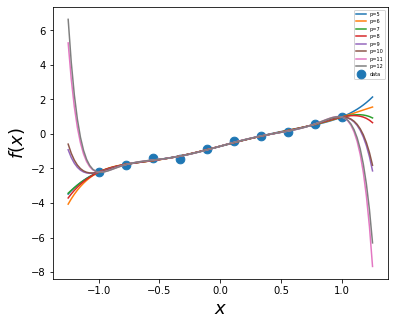

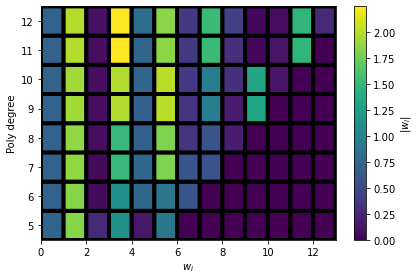

In [78]:
N = 10
X, y = get_data(N,False)
x_grid = np.linspace(-1.25,1.25,100)[:,None]

fig, ax = plt.subplots(figsize=(6, 5))

w_ = [] # to save the number of parameters
p_ = np.arange(5, 13, 1, dtype=np.int32) # polynomial degrees
for p in p_:  # loop over different degrees
    w = polynomial_model_solver(X, y, p,l=1E-3)
    Phi = polynomial_features(x_grid,p)
    print(Phi.shape,w.shape)
    y_pred = Phi@w
    
    plt.plot(x_grid, y_pred, label='p=%s' % p)
    w_.append(np.pad(w, (0, 13-w.shape[0]),
              mode='constant', constant_values=0))
plt.scatter(X[:,-1], y, s=75, label='data')
plt.legend(fontsize=5)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)
# plt.savefig('Figures/polyfit_2.png',dpi=1800)

fig, ax0 = plt.subplots(1, 1)
c = ax0.pcolor(np.abs(np.array(w_)), edgecolors='k', linewidths=4)
fig.colorbar(c, ax=ax0, label=r'$|w_i|$')
ax0.set_xlabel(r'$w_i$')
ax0.set_yticks(np.arange(p_.shape[0])+0.5, p_)
ax0.set_ylabel('Poly degree')
fig.tight_layout()
plt.show()

## Extra ##

Let's revise the operation $\mathbf{X}\mathbf{w}$. 

$$
 \mathbf{X}\mathbf{w}  =  \begin{pmatrix}
\mathbf{x}_1^T\\ 
\vdots \\
\mathbf{x}_N^T
\end{pmatrix} \mathbf{w} = \begin{pmatrix}
[ x_1^0, & \cdots,& x_1^d ] \\ 
\cdots  & \cdots & \cdots \\
[ x_N^0, & \cdots, & x_N^d ] 
\end{pmatrix} \begin{pmatrix} 
w_0\\
\vdots \\
w_d
\end{pmatrix}
$$


In [80]:
print(X.shape)
w = np.random.uniform(-1.,1.,size=(1,25))
z = X@w
print(z.shape)

(10, 1)
(10, 25)
